# Employee Attrition - Analysis and Prediction

In [1]:
# Importing necessary libraries

import os
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
df = os.chdir("D:\\Naveen\\Data Science\\Nuclei - Online\\Projects\\Internship Project 3")
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.shape

(1470, 35)

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


There are no missing numerical data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are no missing data in the entire dataset

### Exploratory Data Analysis

In [6]:
#Dropping columns that are not needed

data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [7]:
#Here age can also be a factor for attrition. 
#We have to group age into broader category and we will be able to copare it with attrition

data['age_groups'] = pd.qcut(data['Age'], 4)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_groups
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,"(36.0, 43.0]"
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,"(43.0, 60.0]"
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,"(36.0, 43.0]"
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,"(30.0, 36.0]"
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,"(17.999, 30.0]"


In [8]:
#splitting categorical data

cat_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50:
        cat_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("-------------------------------------------")

Attrition : ['Yes' 'No']
-------------------------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
-------------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
-------------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
-------------------------------------------
Gender : ['Female' 'Male']
-------------------------------------------
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
-------------------------------------------
MaritalStatus : ['Single' 'Married' 'Divorced']
-------------------------------------------
OverTime : ['Yes' 'No']
-------------------------------------------


#### Univariate analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000237E0FBF460>,
      dtype=object)

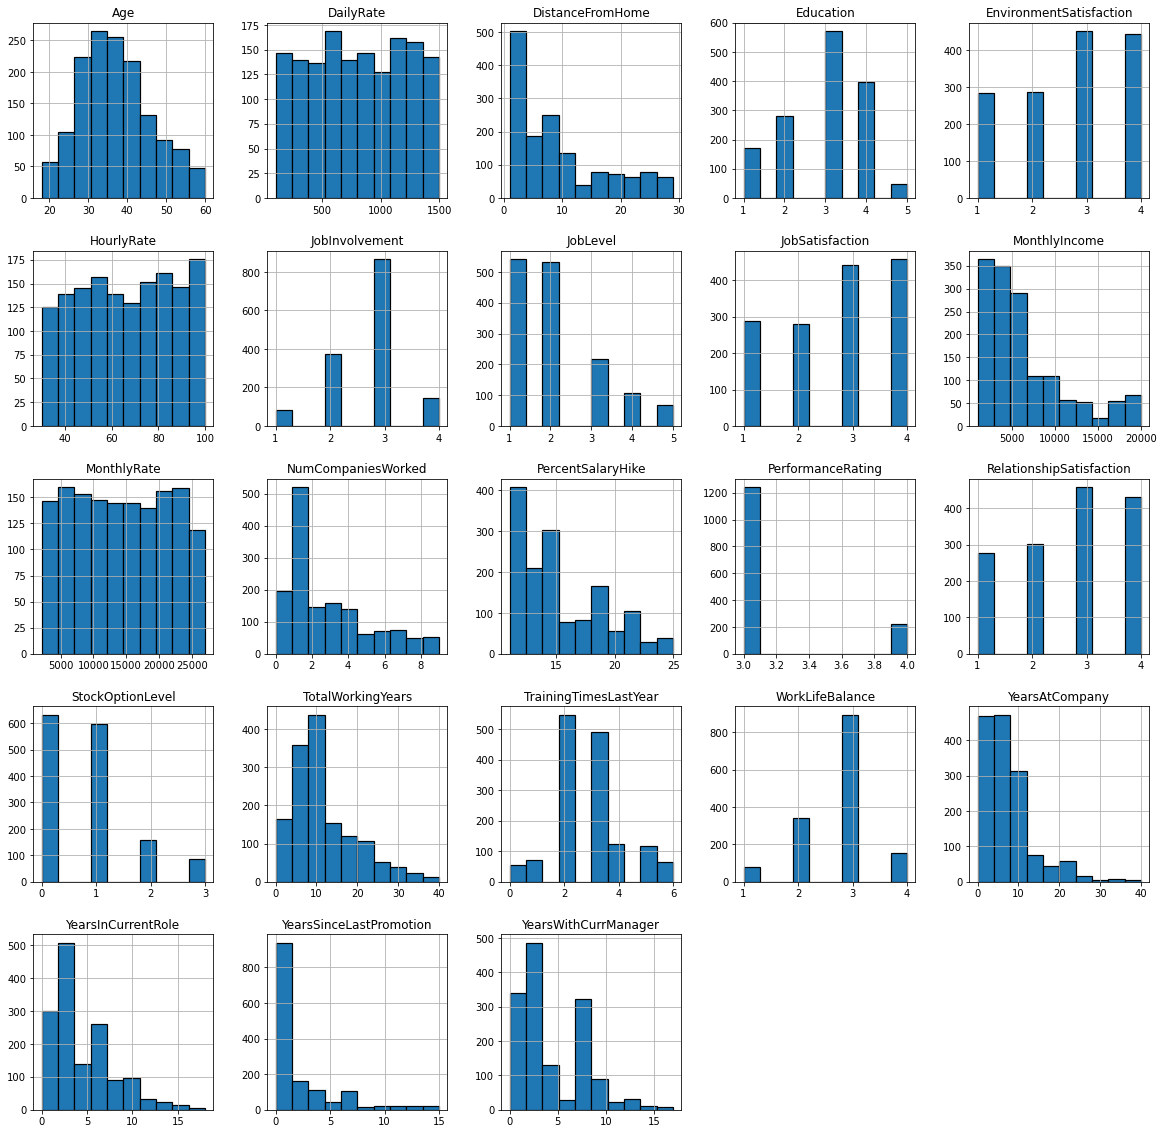

In [9]:
#Visualising every the distribution of every attribute attribute

data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

### Bi-variate analysis against the target variable "Attrition"

In [10]:
data['Attrition'] = data.Attrition.astype("category").cat.codes
data['age_groups'] = data.age_groups.astype("category").cat.codes

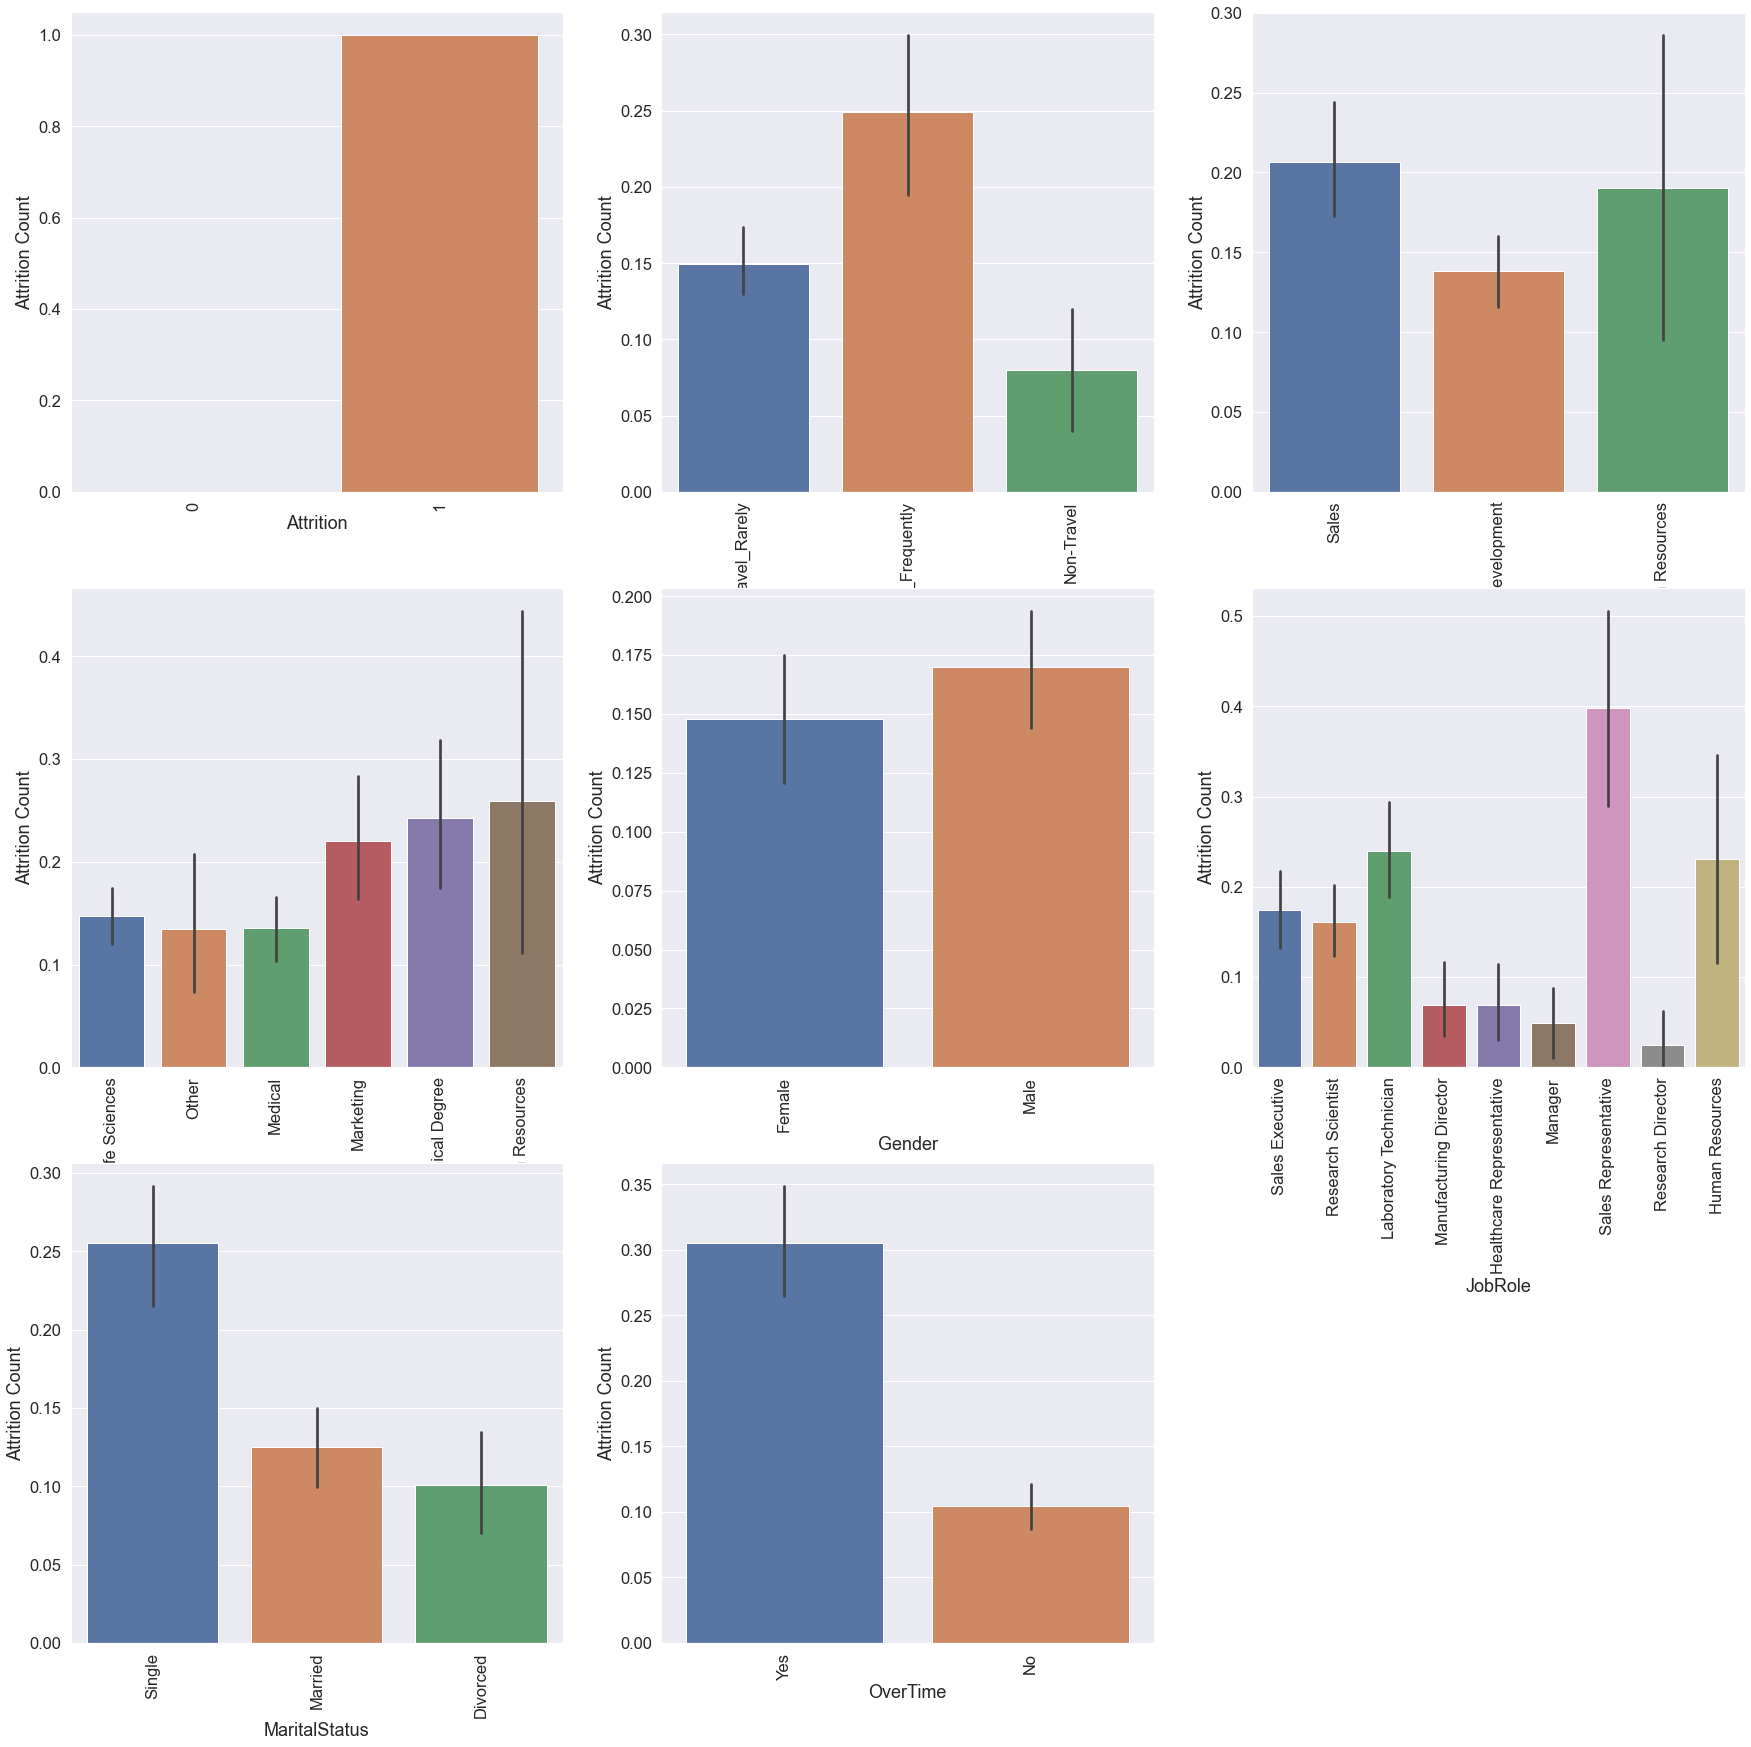

In [11]:
sns.set(font_scale=1.5)
plt.figure(figsize=(30, 30))

for i, column in enumerate(cat_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=data)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

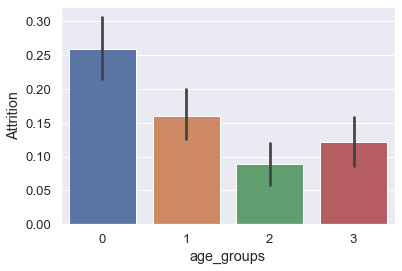

In [12]:
#The grouping has been done and now we will check how it affects attrition

sns.set(font_scale=1.2)
sns.barplot(x= 'age_groups', y= 'Attrition', data=data)

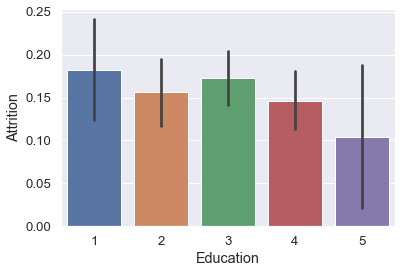

In [13]:
# We will check for educational qualification with attrition

sns.set(font_scale=1.2)
sns.barplot(x= 'Education', y= 'Attrition', data=data)

From Bi variate analysis we can see that: 

1. The employees who travel frequently have higher attrition rate 
2. The employees in sales have a higher attrition rate than employees from other departments. We can also see that the employees with the job role "Sales Representative" have the highest attrition count compared to others
3. Male employees tend to have a high attrition count
4. Employees who work overtime have a higher attrition count
5. Employees aged between 18 - 30 years have a high attrition rate
6. Employees with education 'Below college' and 'Bachelors' have a higher count than others

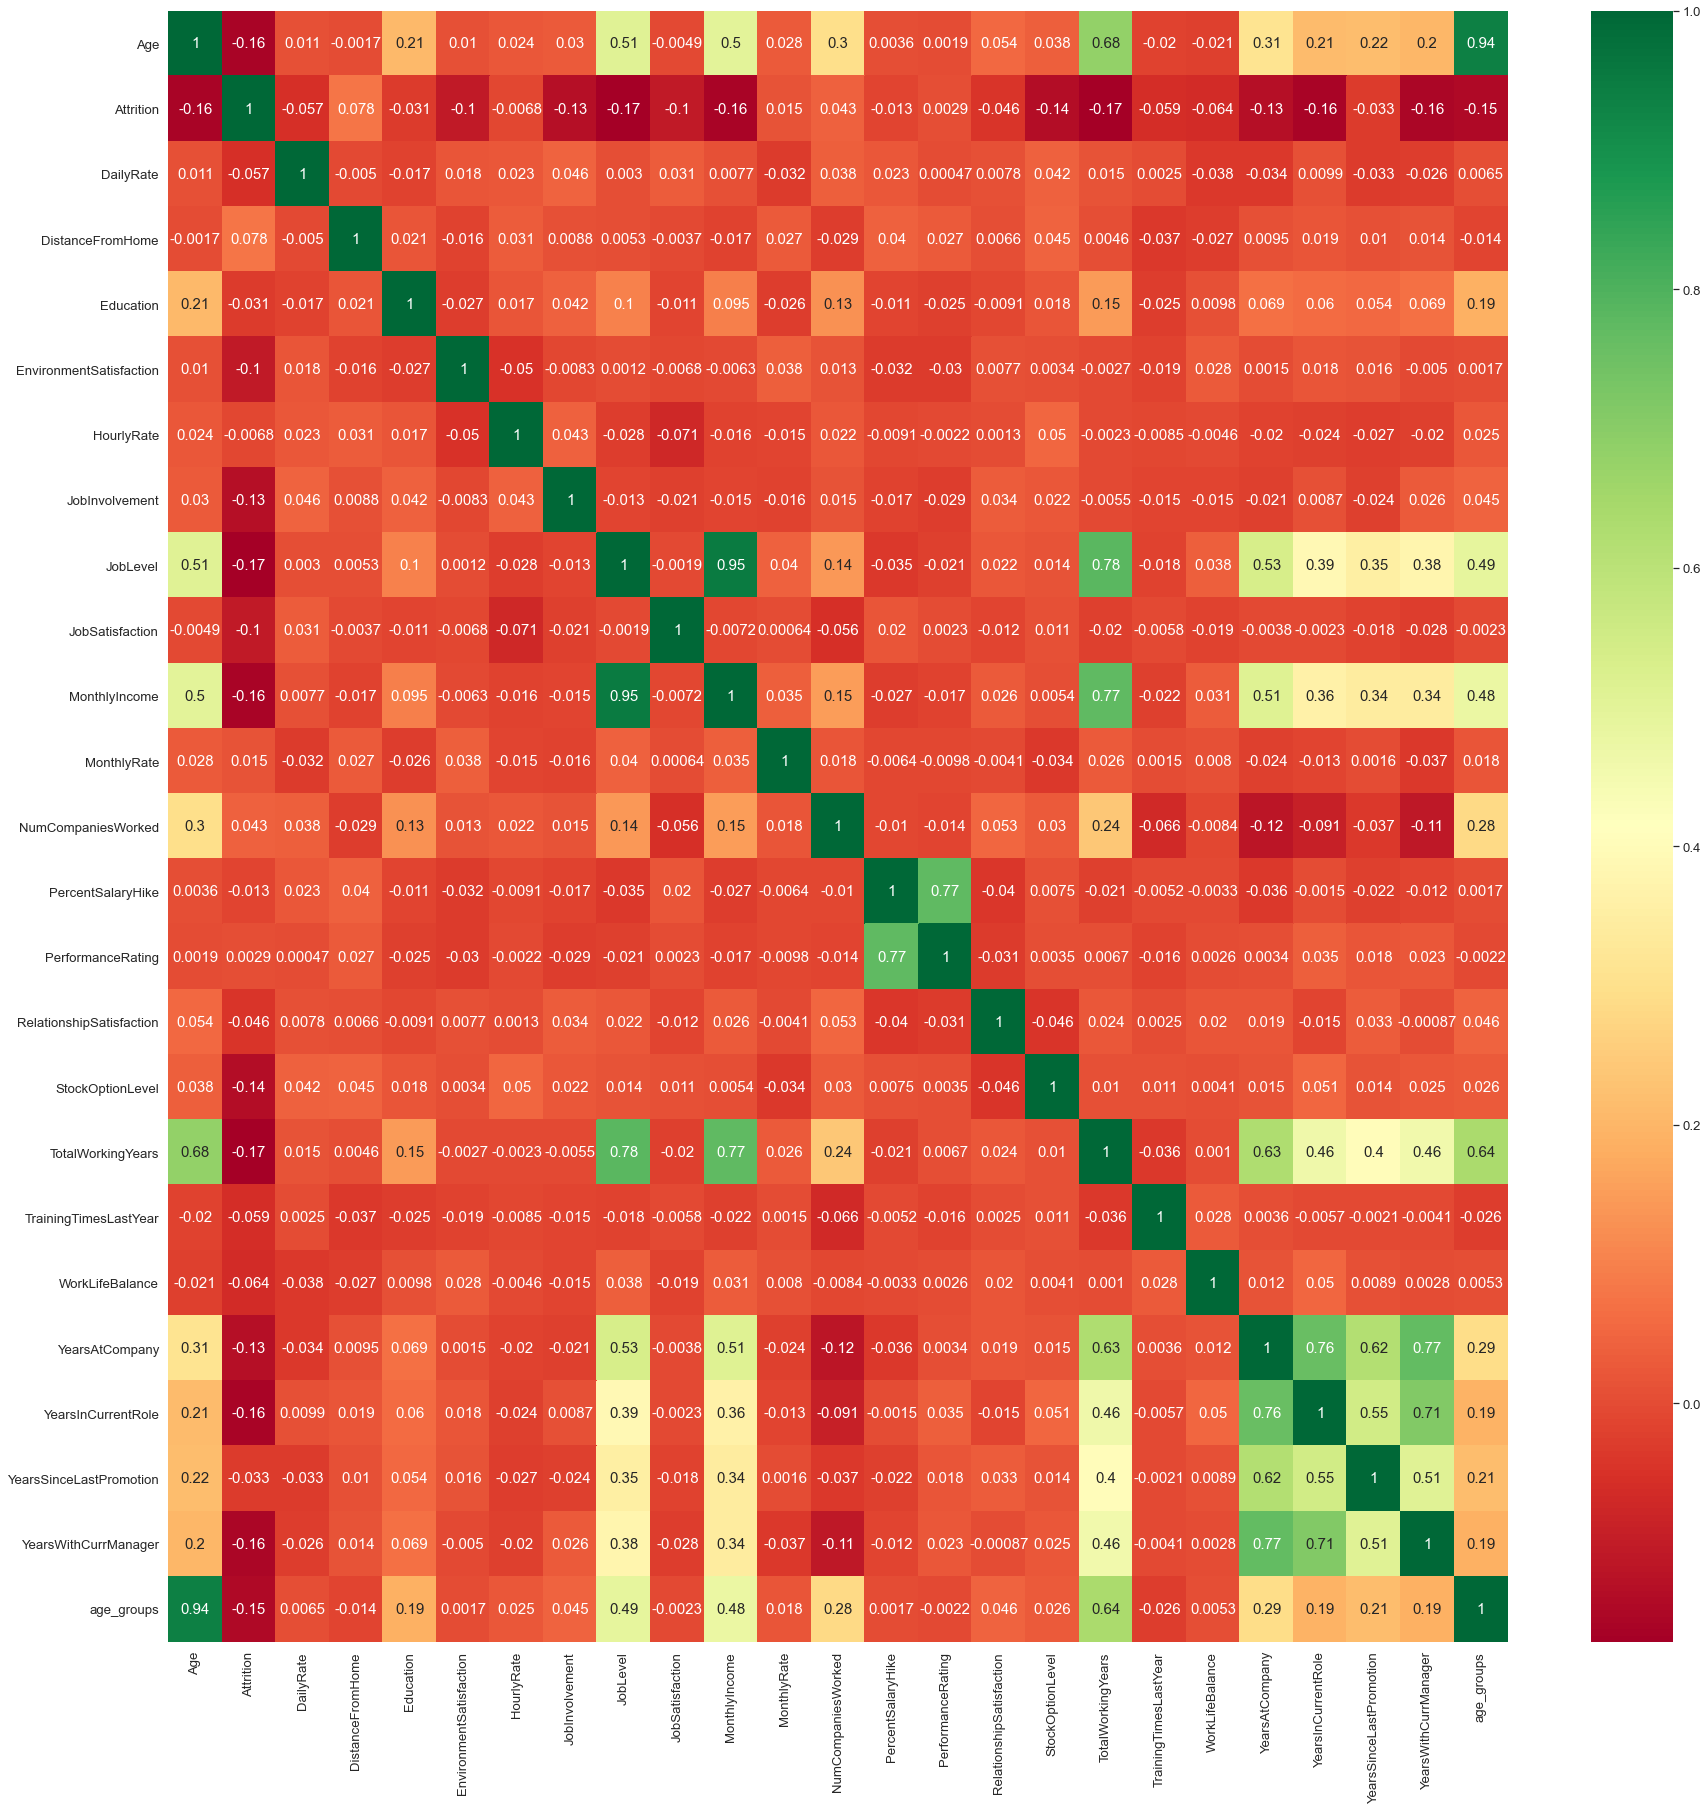

In [14]:
#Checking correlation

plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

## Data Pre-processing

In [15]:
cat_col.remove('Attrition')

In [16]:
#encoding categorical variables in to numerical variables

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in cat_col:
    data[column] = label.fit_transform(data[column])

In [17]:
#Splitting into train and test set

from sklearn.model_selection import train_test_split

X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Building a model

#### Logistic Regression

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)
print("Train Accuracy",accuracy_score(y_train,y_pred_train))
print("Test Accuracy",accuracy_score(y_test,y_pred_test))

Train Accuracy 0.8330308529945554
Test Accuracy 0.8695652173913043


In [19]:
def conf(algo_name,X_test, y_test):
    y_pred = algo_name.predict(X_test)
    forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
    sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(str(algo_name)[0:str(algo_name).find('(')])

None
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       320
           1       0.50      0.02      0.04        48

    accuracy                           0.87       368
   macro avg       0.69      0.51      0.49       368
weighted avg       0.82      0.87      0.81       368



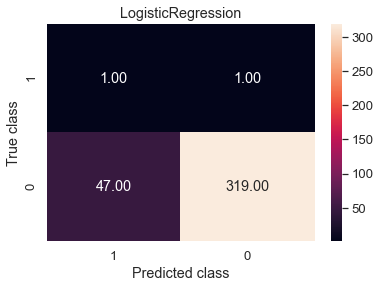

In [20]:
#Classification matrix
from sklearn.metrics import classification_report,confusion_matrix
print(conf(logreg,X_test, y_test))
print(classification_report(y_test,y_pred_test))

Recall is very less. We will check again with Random Forest Classifier

#### Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 3, max_features = 0.5, n_jobs = -1)
rfc.fit(X_train, y_train)

y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

print("Train Accuracy",accuracy_score(y_train,y_pred_train))
print("Test Accuracy",accuracy_score(y_test,y_pred_test))

Train Accuracy 0.9600725952813067
Test Accuracy 0.8641304347826086


None
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       320
           1       0.40      0.08      0.14        48

    accuracy                           0.86       368
   macro avg       0.64      0.53      0.53       368
weighted avg       0.81      0.86      0.82       368



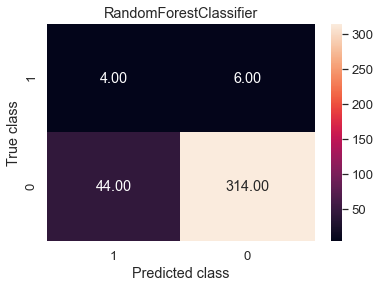

In [22]:
#Classification matrix
from sklearn.metrics import classification_report,confusion_matrix
print(conf(rfc,X_test, y_test))
print(classification_report(y_test,y_pred_test))

Sensitivity is still low. We will now perform hyper parameter tuning

#### Hyperparameter tuning for Random Forest

a) Randomized Search Cross Validation

In [26]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rfc = RandomForestClassifier(random_state=42)

rfc_cv = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rfc_cv.fit(X_train, y_train)
rf_best_params = rfc_cv.best_params_
print(f"Best paramters: {rf_best_params})")

#Again fitting the model

rfc = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 3, max_features = 0.5, n_jobs = -1)
rfc.fit(X_train, y_train)

y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

print("Train Accuracy",accuracy_score(y_train,y_pred_train))
print("Test Accuracy",accuracy_score(y_test,y_pred_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.4min finished


Best paramters: {'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False})
Train Accuracy 0.9609800362976406
Test Accuracy 0.8641304347826086


b) Grid Search Cross Validation

In [27]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rfc = RandomForestClassifier(random_state=42)

rfc_cv = GridSearchCV(rfc, params_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)

rfc_cv.fit(X_train, y_train)
best_params = rfc_cv.best_params_
print(f"Best parameters: {best_params}")

#Again fitting the model

rfc = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 3, max_features = 0.5, n_jobs = -1)
rfc.fit(X_train, y_train)

y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

print("Train Accuracy",accuracy_score(y_train,y_pred_train))
print("Test Accuracy",accuracy_score(y_test,y_pred_test))

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed: 22.3min finished


Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Train Accuracy 0.9555353901996371
Test Accuracy 0.8695652173913043


### Selecting feature importance 

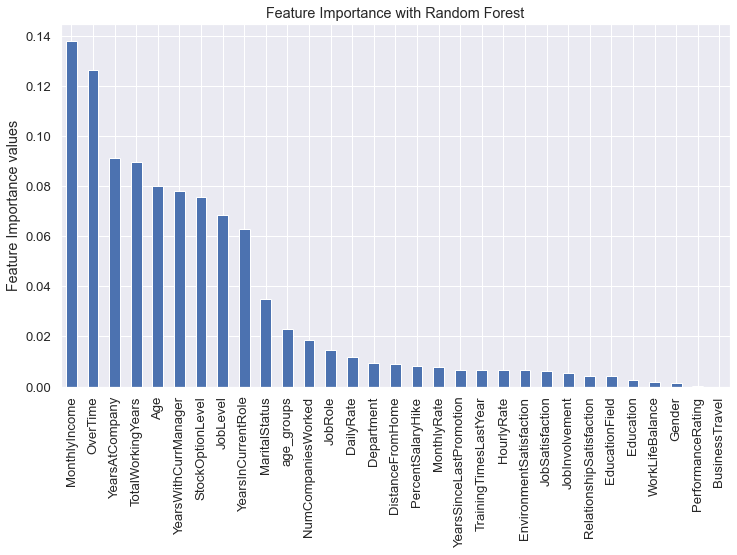

In [23]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
# Define a classifier
rf_clf = RandomForestClassifier(max_depth=10,n_estimators=100, min_samples_leaf=50,
                                  min_samples_split=100, random_state=10)

# Train the model
rf_clf.fit(X_train,y_train)

# Plot the important features
imp_feat_rf = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
imp_feat_rf[:].plot(kind='bar', title='Feature Importance with Random Forest', figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.savefig('FeatImportance.png')
plt.show()

# Save indexes of the important features in descending order of their importance
indices = np.argsort(rf_clf.feature_importances_)[::-1]

# list the names of the names of selected features and remove the unicode
select_feat =[str(s) for s in X_train.columns[indices][:]]

In [24]:
best_features_rf = ["MonthlyIncome", 'OverTime', 'YearsAtCompany', 'TotalWorkingYears', 'Age', 'YearsWithCurrManager', 
                   'StockOptionLevel', 'JobLevel', 'YearsInCurrentRole', 'MaritalStatus', 'age_groups', 
                   'NumCompaniesWorked', 'JobRole', 'DailyRate', 'Department']

### Sampling Attrition using SMOTE

In [34]:
#The variable that we need to predict is imbalanced

data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0, sampling_strategy = 1.0)
X1, y1 = sm.fit_sample(X, y)

In [27]:
X1=pd.DataFrame(X1)
y1=pd.DataFrame(y1)

In [28]:
y1.columns = ["Attrition"]

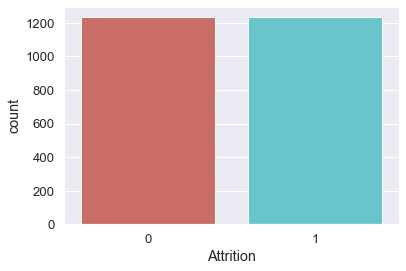

In [29]:
sns.countplot(x='Attrition',data=y1, palette='hls')
plt.show()

In [30]:
X1.columns = X.columns

In [31]:
X1.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_groups
0,41,2,1102,2,1,2,1,2,0,94,...,1,0,8,0,1,6,4,0,5,2
1,49,1,279,1,8,1,1,3,1,61,...,4,1,10,3,3,10,7,1,7,3
2,37,2,1373,1,2,2,4,4,1,92,...,2,0,7,3,3,0,0,0,0,2
3,33,1,1392,1,3,4,1,4,0,56,...,3,0,8,3,3,8,7,3,0,1
4,27,2,591,1,2,1,3,1,1,40,...,4,1,6,3,3,2,2,2,2,0


In [32]:
X1 = X1[best_features_rf] #Subsetting only the best features from RF Model

In [33]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test  = train_test_split(X1,y1,test_size=0.25,random_state=42)

### Logistic Regression after sampling

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)
print("Train Accuracy",accuracy_score(y_train,y_pred_train))
print("Test Accuracy",accuracy_score(y_test,y_pred_test))

Train Accuracy 0.7117360735532721
Test Accuracy 0.6871961102106969


None
              precision    recall  f1-score   support

           0       0.71      0.64      0.67       311
           1       0.67      0.73      0.70       306

    accuracy                           0.69       617
   macro avg       0.69      0.69      0.69       617
weighted avg       0.69      0.69      0.69       617



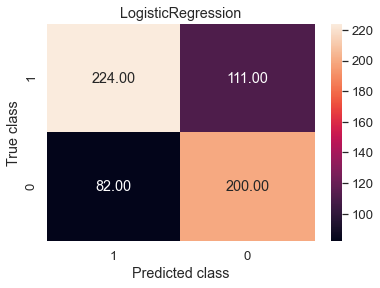

In [36]:
print(conf(logreg,X_test, y_test))
print(classification_report(y_test,y_pred_test))

Sensitivity has improved now

In [37]:
#Fitting the model to predict Attrition

X = X[X1.columns]
y_pred_ori = logreg.predict(X)

print("Overall Accuracy",accuracy_score(y,y_pred_ori))

Overall Accuracy 0.6517006802721088


In [39]:
data['Predicted'] = y_pred_ori

In [40]:
print(classification_report(y,y_pred_ori))

              precision    recall  f1-score   support

           0       0.90      0.65      0.76      1233
           1       0.26      0.64      0.37       237

    accuracy                           0.65      1470
   macro avg       0.58      0.65      0.57      1470
weighted avg       0.80      0.65      0.70      1470



### Random Forest after sampling

In [41]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score

X_train_rf,X_test_rf,y_train_rf,y_test_rf  = train_test_split(X1,y1,test_size=0.25,random_state=42)

# Define a classifier
rf_clf = RandomForestClassifier(max_depth=50,n_estimators=100, min_samples_leaf=50,
                                  min_samples_split=100, random_state=10)


rf_clf.fit(X_train_rf,y_train_rf)

y_pred_train = rf_clf.predict(X_train_rf)
y_pred_test = rf_clf.predict(X_test_rf)
print("Train Accuracy",accuracy_score(y_train_rf,y_pred_train))
print("Test Accuracy",accuracy_score(y_test_rf,y_pred_test))

Train Accuracy 0.7836668469442942
Test Accuracy 0.7293354943273906


None
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       311
           1       0.74      0.70      0.72       306

    accuracy                           0.73       617
   macro avg       0.73      0.73      0.73       617
weighted avg       0.73      0.73      0.73       617



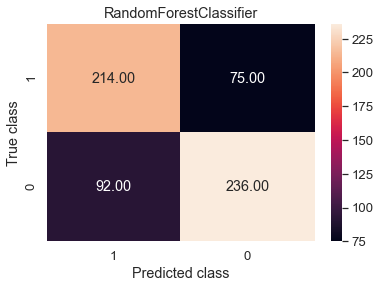

In [42]:
print(conf(rf_clf,X_test_rf, y_test_rf))
print(classification_report(y_test_rf,y_pred_test))

In [44]:
#Fitting the RF model to predict attrition

y_pred_ori_rf =  rf_clf.predict(X)

In [45]:
print("Overall Accuracy",accuracy_score(y,y_pred_ori_rf))

Overall Accuracy 0.7598639455782313


In [46]:
print(classification_report(y,y_pred_ori_rf))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1233
           1       0.35      0.59      0.44       237

    accuracy                           0.76      1470
   macro avg       0.63      0.69      0.65      1470
weighted avg       0.82      0.76      0.78      1470



In [47]:
data_rf = data.copy()
data_rf['Predicted'] = y_pred_ori_rf
data_rf.to_csv("D:\\Naveen\\Data Science\\Nuclei - Online\\Projects\\Internship Project 3\\RF predicted output.csv")